# Diabetes Prediction Analysis

#### Importing the necessary libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

#### Loading the dataset into a pandas dataframe

In [5]:
df = pd.read_csv("G:/Python Projects/Diabetes Prediction/diabetes.csv")

#### Finding shape of the dataset and statistical information

In [7]:
df.shape   # Rows = 768, Columns = 9

(768, 9)

In [8]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Checking for null values

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Checking the distribution of diabetes outcome

In [14]:
df['Outcome'].value_counts()    # 0 --> Not Diabetes , 1 --> Diabetes

Outcome
0    500
1    268
Name: count, dtype: int64

In [15]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


#### Finding the Correlation between the features and plotting a heatmap

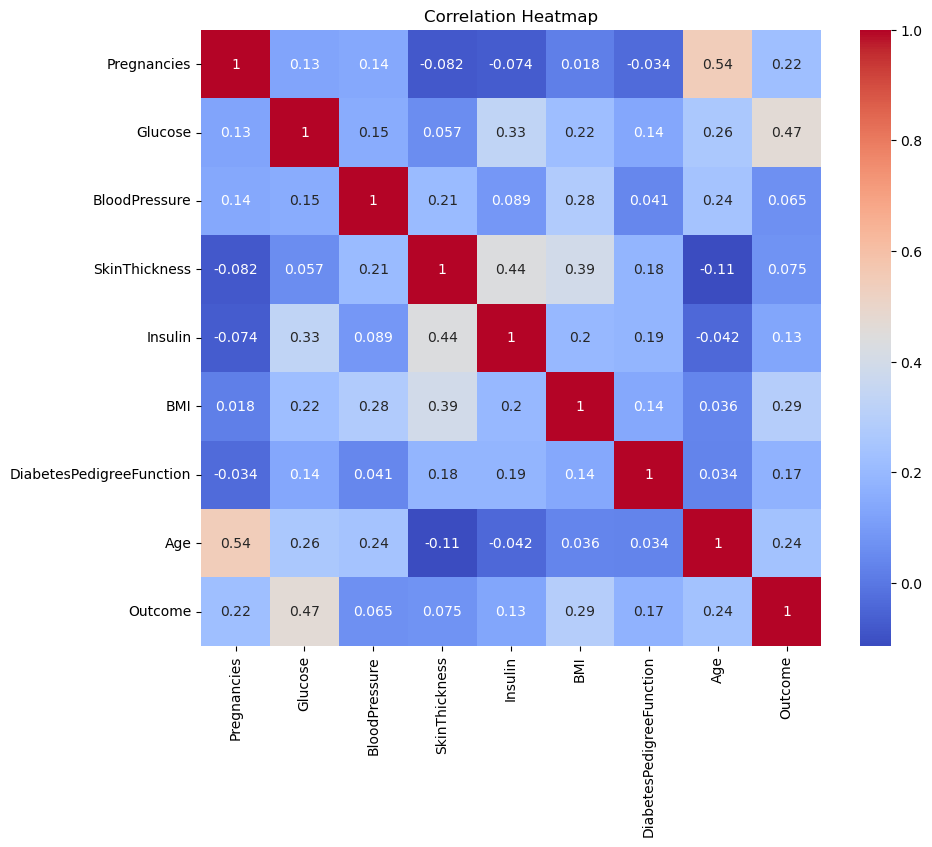

In [17]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

#### Creating a paiplot and showing relationships among the top 5 important features

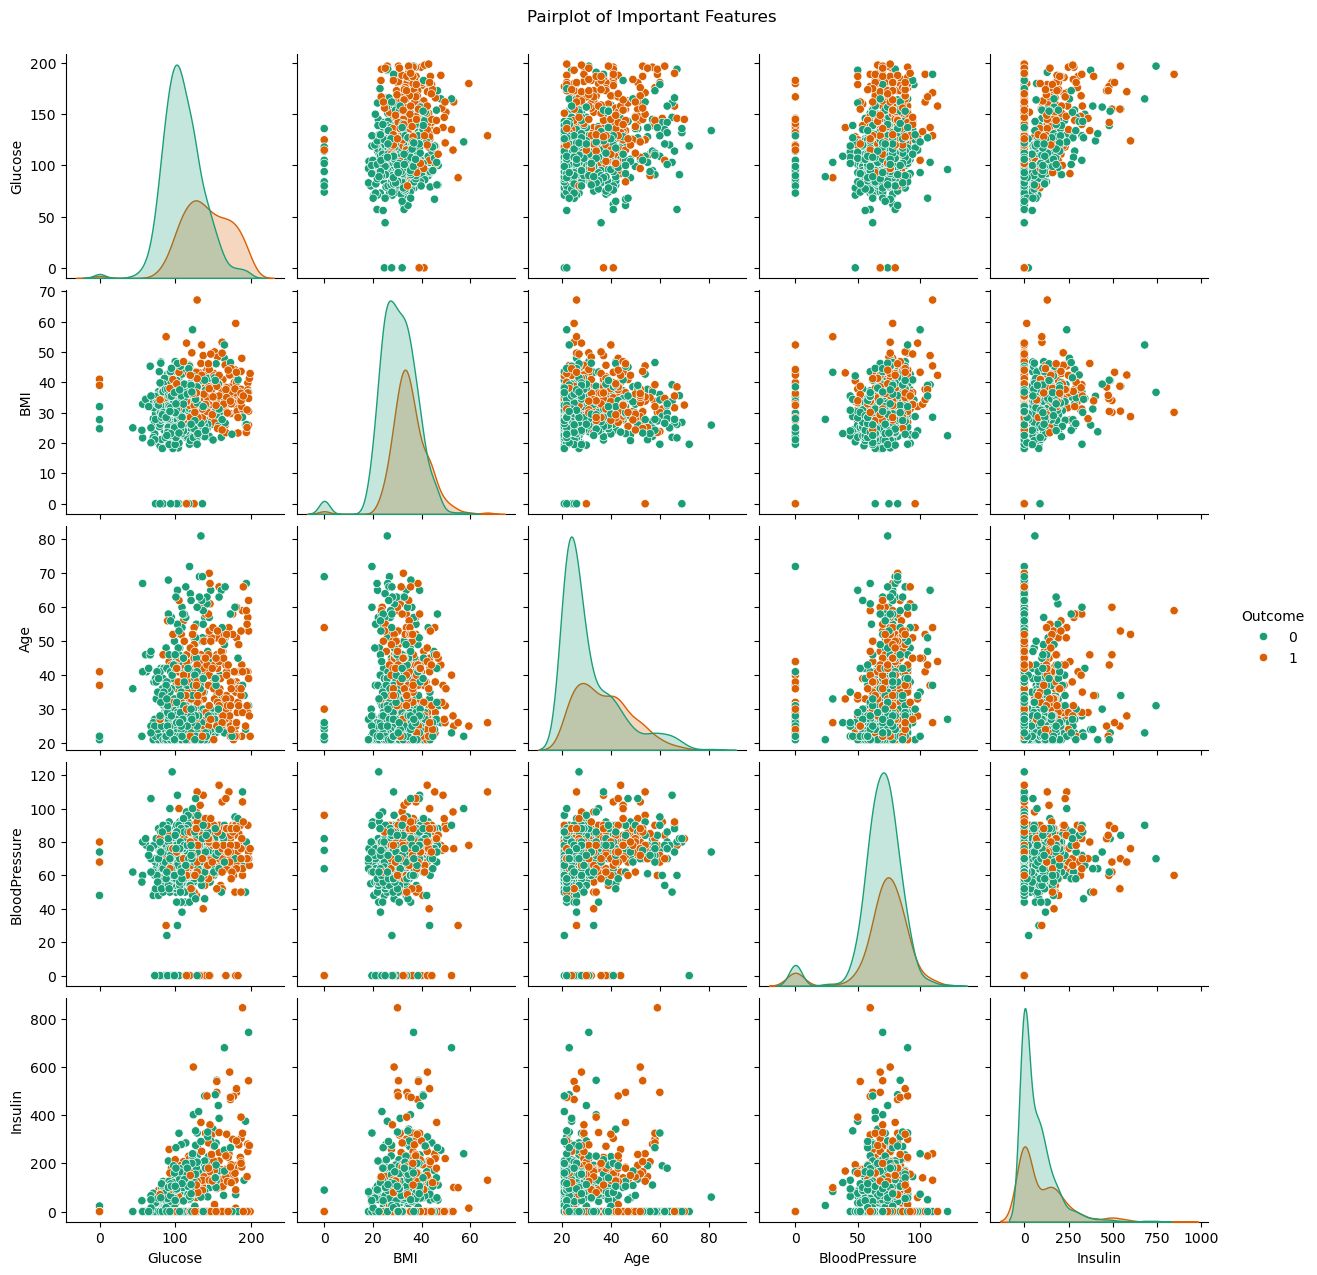

In [19]:
top_features = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin', 'Outcome']

sns.pairplot(df[top_features], hue='Outcome', palette='Dark2')
plt.suptitle('Pairplot of Important Features', y=1.02)
plt.show()

### Data Preprocessing

#### Seperating the data and labels

In [22]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

#### Using Train-Test-Split and Data Standardization

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
print(x_train.shape)

(614, 8)


In [26]:
print(x_test.shape)

(154, 8)


In [27]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

### Building Logistic Regression Model

In [29]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(scaled_x_train,y_train)

LogisticRegression(random_state=42)

#### Prediction on Test Data

In [31]:
logreg_y_pred = logreg.predict(scaled_x_test)

### Evaluating the model

In [33]:
# Accuracy Score

logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
print(f"{logreg_accuracy:0.2f}")

0.75


In [34]:
# Confusion Matrix

logreg_confm = confusion_matrix(y_test, logreg_y_pred)
print(logreg_confm)

[[79 20]
 [18 37]]


In [35]:
# Classification Report

print(classification_report(y_test, logreg_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



#### Finding the ROC AUC curve

In [37]:
# Calculating the prediction probabilities

y_pred_prob = logreg.predict_proba(scaled_x_test)[:,1]

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [39]:
# Calculating the roc auc score

roc_auc = roc_auc_score(y_test, y_pred_prob)

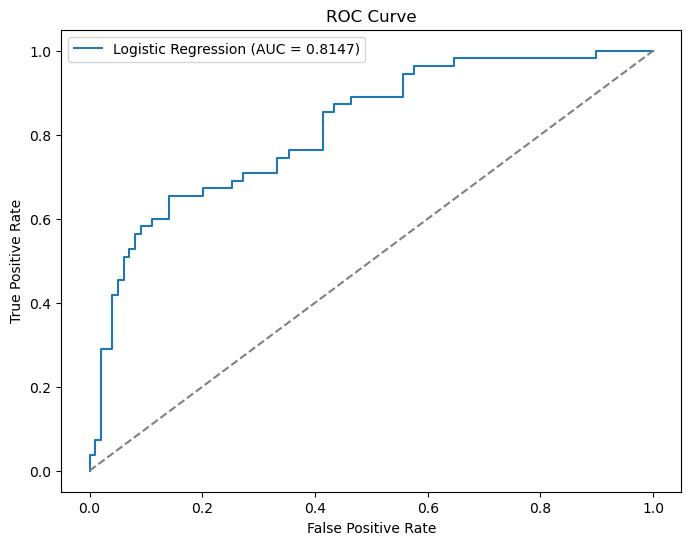

In [40]:
# Plotting ROC Curve

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Building Decision Tree Classifier

In [42]:
# As Decision Tree Classifier focus on individual feature values and independent of the scale of other features hence I haven't used Scaling

dtree = DecisionTreeClassifier(random_state = 42)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
# Prediction on Test Data

y_pred_dtree = dtree.predict(x_test)

### Evaluating the model

In [45]:
# Accuracy Score

dtree_acc = accuracy_score(y_test, y_pred_dtree)
print(f"{dtree_acc:0.2f}")

0.75


In [46]:
# Confusion Matrix

dtree_cnfm = confusion_matrix(y_test, y_pred_dtree)
print(dtree_cnfm)

[[75 24]
 [15 40]]


In [47]:
# Classification Report

print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



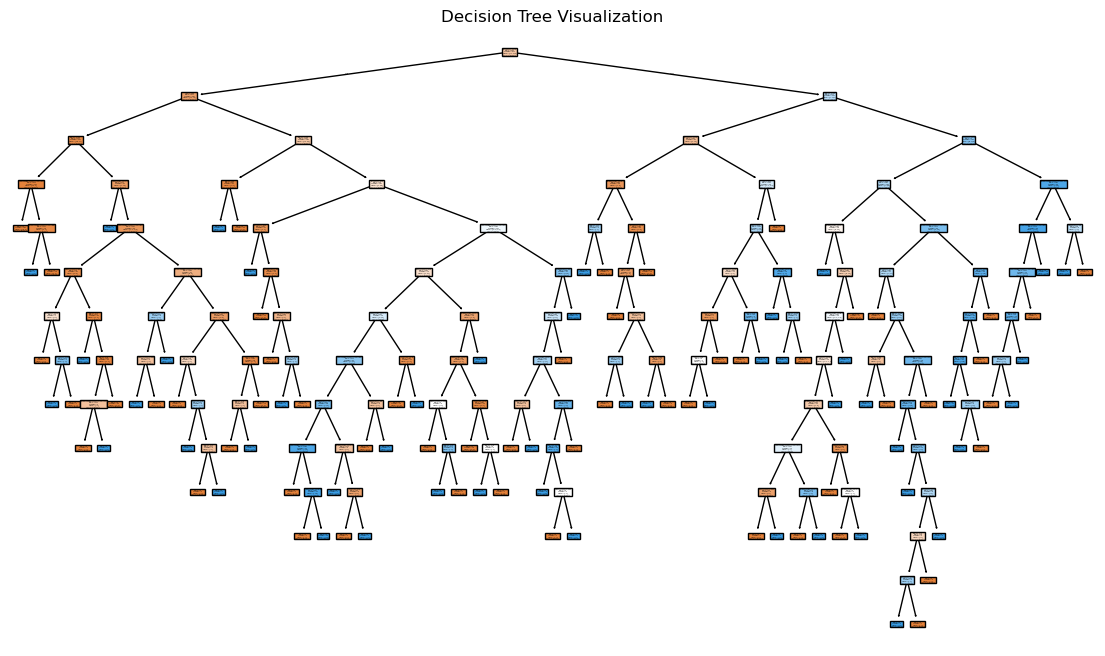

In [48]:
# Visualizing the decision tree

plt.figure(figsize=(14,8))
plot_tree(dtree, filled=True, feature_names=x.columns, class_names=["No Diabetes", "Diabetes"])
plt.title("Decision Tree Visualization")
plt.show()

### Finding the ROC AUC curve

In [50]:
dtree_pred_prob = dtree.predict_proba(x_test)[:, 1]

In [51]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dtree_pred_prob)

In [52]:
dtree_roc_auc = roc_auc_score(y_test, dtree_pred_prob)

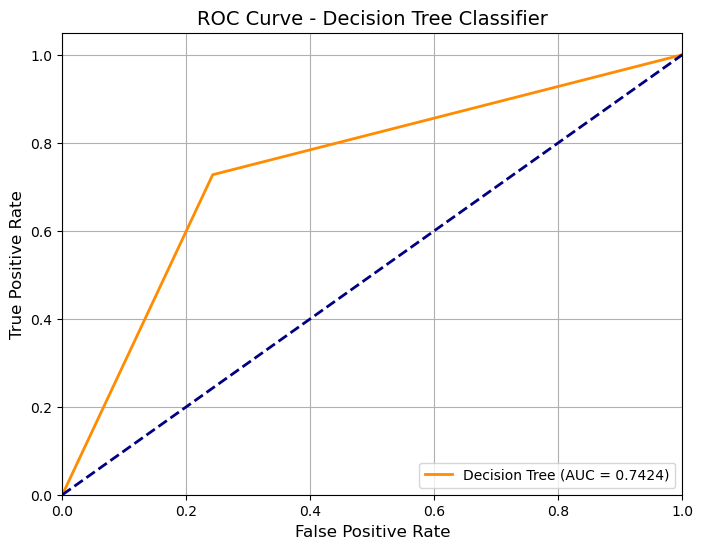

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (AUC = {dtree_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Decision Tree Classifier', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Comparing the model performance between Logistic regression & Decision Tree 

In [55]:
print(f"Logistic Regression : {logreg_accuracy:.4f}")
print(f"Decision Tree : {dtree_acc:.4f}")

Logistic Regression : 0.7532
Decision Tree : 0.7468


### Making a Prediction System

In [121]:
input_data = (1,89,66,23,94,28.1,0.167,21)

# Defining feature names
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Creating a DataFrame from the input data
input_df = pd.DataFrame([input_data], columns=feature_names)

# Standardizing the input data
std_data = scaler.transform(input_df)

prediction = logreg.predict(std_data)
print(std_data)

if(prediction[0]==0):
   print("The Person is Not Diabetic")
else:
    print("The Person is Diabetic")


[[-0.82846011 -0.99519166 -0.1846361   0.16866024  0.10816148 -0.50209819
  -0.89777954 -1.03594038]]
The Person is Not Diabetic
